<a href="https://colab.research.google.com/github/AlexMcClung/IR-Tasks/blob/master/pandas-ifelse-case-when.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#If-else and Case-when in Pandas
Pandas does not ship with any obvious functions for if-else or case-when. Here are some examples of how to recode data in these situtations using just Pandas and not numpy.

In [2]:
import pandas as pd
import seaborn as sns

# example data set
df = sns.load_dataset('mpg')

df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
175,29.0,4,90.0,70.0,1937,14.0,75,europe,volkswagen rabbit
269,30.9,4,105.0,75.0,2230,14.5,78,usa,dodge omni
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
381,36.0,4,107.0,75.0,2205,14.5,82,japan,honda accord
370,31.0,4,112.0,85.0,2575,16.2,82,usa,pontiac j2000 se hatchback


Quick 1-0 Binaries

In [15]:
# equal some value example
df['european'] = (df['origin'] == 'europe').astype(int)

# lt gt example
df['guzzler'] = (df['mpg'] < 18).astype(int)

# multiple conditions
df['detroit_muscle'] = ((df['horsepower'] >= 200) & (df['origin'] == 'usa')).astype(int)

# is in example
df['non european'] = (df['origin'].isin(['usa','japan'])).astype(int)

print('------------------')
print(df['european'].value_counts(dropna=False))
print('------------------')
print(df['guzzler'].value_counts(dropna=False))
print('------------------')
print(df['detroit_muscle'].value_counts(dropna=False))
print('------------------')
print(df['non european'].value_counts(dropna=False))

------------------
0    328
1     70
Name: european, dtype: int64
------------------
0    291
1    107
Name: guzzler, dtype: int64
------------------
0    387
1     11
Name: detroit_muscle, dtype: int64
------------------
1    328
0     70
Name: non european, dtype: int64


The .loc method

In [21]:
# two level example
df['Non US'] = 1
df.loc[df['origin'] == 'usa', 'Non US'] = 0

# multiple levels
df.loc[df['mpg'] < 18, 'mpg_lev'] = 'low'
df.loc[(df['mpg'] >= 18) & (df['mpg'] < 30), 'mpg_lev'] = 'medium'
df.loc[df['mpg'] >= 30, 'mpg_lev'] = 'high'

print(df['origin'].value_counts(dropna=False))
print('-----------------------')
print(df['Non US'].value_counts(dropna=False))
print('-----------------------')
print(df['mpg_lev'].value_counts(dropna=False))

usa       249
japan      79
europe     70
Name: origin, dtype: int64
-----------------------
0    249
1    149
Name: Non US, dtype: int64
-----------------------
medium    199
low       107
high       92
Name: mpg_lev, dtype: int64


Applying a lambda function

In [19]:
# Yes/No version of guzzler binary
df['guzzler_yn'] = df['mpg'].apply(lambda x: 'Yes' if x < 18 else 'No')

print(df['guzzler_yn'].value_counts())
print('------------------')

No     291
Yes    107
Name: guzzler_yn, dtype: int64
------------------


Write and apply a function

In [26]:
def fxn(x):
  if x >= 23:
    return 'Definitely not a guzzler'
  elif (x >= 18) & (x < 23):
    return 'Not great on gas, but not a total guzzler'
  else:
    return 'Guzzler'

df['guzz_func'] = df['mpg'].apply(fxn)

print(df['guzz_func'].value_counts(dropna=False))

Definitely not a guzzler                     201
Guzzler                                      107
Not great on gas, but not a total guzzler     90
Name: guzz_func, dtype: int64


In [23]:
df.mpg.describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

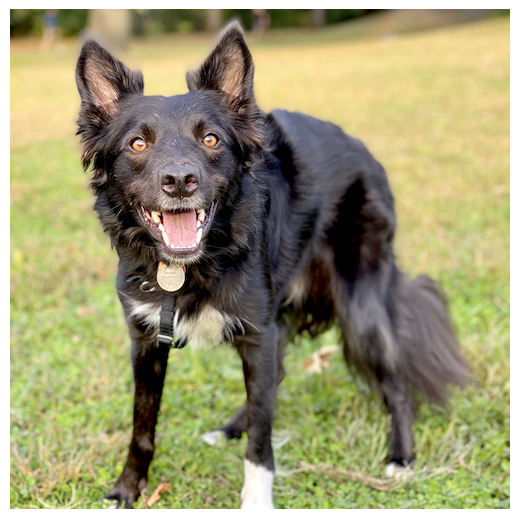

In [27]:
sns.dogplot()